<a href="https://colab.research.google.com/github/sezaionurlu/Association-Rule-Based-Recommender-System---Online-Retail/blob/main/Association_Rule_Based_Recommender_System_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**İş Problemi**

Aşağıda 3 farklı kullanıcının sepet bilgileri verilmiştir. Bu sepet bilgilerine en
uygun ürün önerisini birliktelik kuralı kullanarak yapınız. Ürün önerileri 1 tane
ya da 1'den fazla olabilir. Karar kurallarını 2010-2011 Germany müşterileri
üzerinden türetiniz.

Kullanıcı 1’in sepetinde bulunan ürünün id'si: 21987

Kullanıcı 2’in sepetinde bulunan ürünün id'si : 23235

Kullanıcı 3’in sepetinde bulunan ürünün id'si : 22747

**Veri Seti Hikayesi**

Online Retail II isimli veri seti İngiltere merkezli bir perakende şirketinin 01/12/2009 - 09/12/2011 tarihleri arasındaki online satış
işlemlerini içeriyor. Şirketin ürün kataloğunda hediyelik eşyalar yer almaktadır ve çoğu müşterisinin toptancı olduğu bilgisi
mevcuttur.

**Değişkenler**

>>> 8 Deşiken

>>> 541.909 Gözlem

>>> 45.6 MB

InvoiceNo >>> Fatura Numarası ( Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder )

StockCode >>> Ürün kodu ( Her bir ürün için eşsiz )

Description >>> Ürün ismi

Quantity >>> Ürün adedi ( Faturalardaki ürünlerden kaçar tane satıldığı)

InvoiceDate >>> Fatura tarihi

UnitPrice >>> Fatura fiyatı ( Sterlin )

CustomerID >>> Eşsiz müşteri numarası

Country >>> Ülke ismi

**PROJE GÖREVLERİ**

**Görev 1:** Veriyi Hazırlama

**Adım 1:** Online Retail II veri setinden 2010-2011 sheet’ini okutunuz.

In [ ]:
!pip install mlxtend
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
# çıktının tek bir satırda olmasını sağlar.
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_ = pd.read_excel("/content/drive/MyDrive/Veri Bilimi/online_retail_II.xlsx",
                    sheet_name="Year 2010-2011")

In [ ]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Adım 2:** StockCode’u POST olan gözlem birimlerini drop ediniz. (POST her faturaya eklenen bedel, ürünü ifade etmemektedir.)

In [ ]:
df = df[df['StockCode'] != 'POST']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Adım 3:** Boş değer içeren gözlem birimlerini drop ediniz.

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1450
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135020
Country             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

**Adım 4:** Invoice içerisinde C bulunan değerleri veri setinden çıkarınız. (C faturanın iptalini ifade etmektedir.)

In [ ]:
df = df[~df['Invoice'].str.contains('C', na=False)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Adım 5:** Price değeri sıfırdan küçük olan gözlem birimlerini filtreleyiniz.

In [ ]:
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


**Adım 6:** Price ve Quantity değişkenlerinin aykırı değerlerini inceleyiniz, gerekirse baskılayınız.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,396825.0,13.050025,180.669041,1.0,2.00,6.00,12.00,80995.00
Price,396825.0,3.037371,17.828868,0.0,1.25,1.95,3.75,4161.06
Customer ID,396825.0,15301.354595,1709.881541,12346.0,13975.00,15159.00,16801.00,18287.00


In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

df.describe().T

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,count,mean,std,min,25%,50%,75%,max
Quantity,396825.0,11.858647,25.565206,1.0,2.00,6.00,12.00,298.50
Price,396825.0,2.835319,2.982356,0.0,1.25,1.95,3.75,31.56
Customer ID,396825.0,15301.354595,1709.881541,12346.0,13975.00,15159.00,16801.00,18287.00


**Görev 2:** Alman Müşteriler Üzerinden Birliktelik Kuralları Üretme

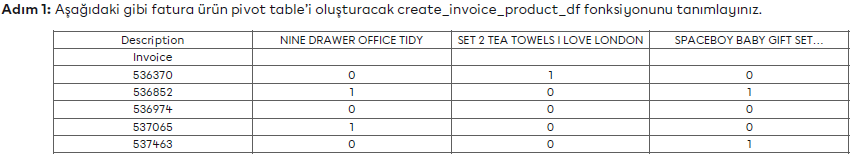

In [ ]:
df = df[df['Country'] == 'Germany']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6.0,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6.0,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12.0,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12.0,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12.0,2010-12-01 13:04:00,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12.0,2011-12-09 12:16:00,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12.0,2011-12-09 12:16:00,2.08,12713.0,Germany


In [ ]:
df_pvt = df.pivot_table(index = 'Invoice', columns = 'Description', values='Quantity')
df_pvt = df_pvt.fillna(0).applymap(lambda x: 1 if x > 0 else 0)
df_pvt

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  12 PINK HEN+CHICKS IN BASKET  12 RED ROSE PEG PLACE SETTINGS  16 PIECE CUTLERY SET PANTRY DESIGN  2 PICTURE BOOK EGGS EASTER BUNNY  2 PICTURE BOOK EGGS EASTER CHICKS  20 DOLLY PEGS RETROSPOT  200 BENDY SKULL STRAWS  200 RED + WHITE BENDY STRAWS  3 DRAWER ANTIQUE WHITE WOOD CABINET  3 HOOK HANGER MAGIC GARDEN  3 HOOK PHOTO SHELF ANTIQUE WHITE  3 PIECE SPACEBOY COOKIE CUTTER SET  3 RAFFIA RIBBONS 50'S CHRISTMAS   3 STRIPEY MICE FELTCRAFT  3 TIER CAKE TIN GREEN AND CREAM  3 TIER CAKE TIN RED AND CREAM  3 TIER SWEETHEART GARDEN SHELF  3 TRADITIONAl BISCUIT CUTTERS  SET  36 DOILIES DOLLY GIRL  36 FOIL HEART CAKE CASES  36 FOIL STAR CAKE CASES   36 PENCILS TUBE RED RETROSPOT  36 PENCILS TUBE SKULLS  36 PENCILS TUBE WOODLAND  3D CHRISTMAS STAMPS STICKERS   3D TRADITIONAL CHRISTMAS STICKERS  3D VINTAGE CHRISTMAS STICKERS   4 LAVENDER BOTANICAL DINNER CANDLES  4 TRADITIONAL SPINNING TOPS  5 HOOK HANGER MAGIC TOADSTOOL  5 HOOK HANGER RED MAGIC TOADSTOOL  50'S CHRISTMAS PAPER GIFT BAG  6 GIFT TAGS 50'S CHRISTMAS   6 GIFT TAGS VINTAGE CHRISTMAS   6 RIBBONS ELEGANT CHRISTMAS   6 RIBBONS EMPIRE    6 RIBBONS RUSTIC CHARM  6 RIBBONS SHIMMERING PINKS   60 CAKE CASES DOLLY GIRL DESIGN  60 CAKE CASES VINTAGE CHRISTMAS  60 TEATIME FAIRY CAKE CASES  72 SWEETHEART FAIRY CAKE CASES  ABC TREASURE BOOK BOX   ACRYLIC GEOMETRIC LAMP  ACRYLIC HANGING JEWEL,PINK  ADULT APRON APPLE DELIGHT  ADVENT CALENDAR GINGHAM SACK  AIRLINE BAG VINTAGE JET SET BROWN  AIRLINE BAG VINTAGE JET SET RED  AIRLINE BAG VINTAGE JET SET WHITE  AIRLINE BAG VINTAGE TOKYO 78  AIRLINE BAG VINTAGE WORLD CHAMPION   ALARM CLOCK BAKELIKE CHOCOLATE  ALARM CLOCK BAKELIKE GREEN  ALARM CLOCK BAKELIKE IVORY  ALARM CLOCK BAKELIKE ORANGE  ALARM CLOCK BAKELIKE PINK  ALARM CLOCK BAKELIKE RED   ALPHABET HEARTS STICKER SHEET  ALPHABET STENCIL CRAFT  ANGEL DECORATION PAINTED ZINC   ANIMAL STICKERS  ANT COPPER LIME BOUDICCA BRACELET  ANT COPPER PINK BOUDICCA BRACELET  ANT COPPER TURQ BOUDICCA BRACELET  ANTIQUE GLASS DRESSING TABLE POT  ANTIQUE GLASS PEDESTAL BOWL  ANTIQUE SILVER T-LIGHT GLASS  APOTHECARY MEASURING JAR  APPLE BATH SPONGE  APRON APPLE DELIGHT  AREA PATROLLED METAL SIGN  ASS FLORAL PRINT MULTI SCREWDRIVER  ASSORTED BOTTLE TOP  MAGNETS   ASSORTED COLOUR BIRD ORNAMENT  ASSORTED COLOUR LIZARD SUCTION HOOK  ASSORTED COLOUR MINI CASES  ASSORTED COLOUR T-LIGHT HOLDER  ASSORTED COLOURS SILK FAN  ASSORTED EASTER DECORATIONS  BELLS  ASSORTED EASTER GIFT TAGS  ASSORTED FLOWER COLOUR "LEIS"  ASSORTED MONKEY SUCTION CUP HOOK  ASSORTED TUTTI FRUTTI BRACELET  ASSORTED TUTTI FRUTTI PEN  ASSTD DESIGN 3D PAPER STICKERS  ASSTD DESIGN RACING CAR PEN  ASSTD FRUIT+FLOWERS FRIDGE MAGNETS  BABUSHKA LIGHTS STRING OF 10  BABY BOOM RIBBONS   BAG 125g SWIRLY MARBLES  BAG 250g SWIRLY MARBLES  BAG 500g SWIRLY MARBLES  BAKING MOULD CHOCOLATE CUPCAKES  BAKING MOULD EASTER EGG WHITE CHOC  BAKING MOULD HEART MILK CHOCOLATE  BAKING MOULD HEART WHITE CHOCOLATE  BAKING MOULD ROSE MILK CHOCOLATE  BAKING MOULD ROSE WHITE CHOCOLATE  BAKING MOULD TOFFEE CUP CHOCOLATE  BAKING SET 9 PIECE RETROSPOT   BAKING SET SPACEBOY DESIGN  BALLOON ART MAKE YOUR OWN FLOWERS  BALLOON PUMP WITH 10 BALLOONS  BALLOON WATER BOMB PACK OF 35  BALLOONS  WRITING SET   BANQUET BIRTHDAY  CARD    BASKET OF TOADSTOOLS  BATH BUILDING BLOCK WORD  BATHROOM METAL SIGN  BEACH HUT SHELF W 3 DRAWERS  BEADED CHANDELIER T-LIGHT HOLDER  BEADED CRYSTAL HEART GREEN LARGE  BELLE JARDINIERE CUSHION COVER  BEWARE OF THE CAT METAL SIGN   BICYCLE PUNCTURE REPA

In [ ]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

**Adım 2:** Kuralları oluşturacak create_rules fonksiyonunu tanımlayınız ve alman müşteriler için kurallarını bulunuz.

In [ ]:
def create_rules(dataframe, id=True, country="France"):
    dataframe = dataframe[dataframe['Country'] == country]
    dataframe = create_invoice_product_df(dataframe, id)
    frequent_itemsets = apriori(dataframe, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
    return rules

In [ ]:
create_rules(df, country='Germany')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(16237),(22326),0.011136,0.249443,0.011136,1.000000,4.008929,0.008358,inf
1,(22326),(16237),0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
2,(20674),(20675),0.022272,0.033408,0.013363,0.600000,17.960000,0.012619,2.416481
3,(20675),(20674),0.033408,0.022272,0.013363,0.400000,17.960000,0.012619,1.629547
4,(20674),(20676),0.022272,0.037862,0.011136,0.500000,13.205882,0.010293,1.924276
...,...,...,...,...,...,...,...,...,...
18365,(22629),"(22467, 22326, 22423, 21915, 22077)",0.104677,0.011136,0.011136,0.106383,9.553191,0.009970,1.106586
18366,(22326),"(22467, 22629, 22423, 21915, 22077)",0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
18367,(22423),"(22467, 22629, 22326, 21915, 22077)",0.140312,0.011136,0.011136,0.079365,7.126984,0.009573,1.074111
18368,(21915),"(22467, 22629, 22326, 22423, 22077)",0.046771,0.011136,0.011136,0.238095,21.380952,0.010615,1.297884


**Görev 2:** Sepet İçerisindeki Ürün Id’leri Verilen Kullanıcılara Ürün Önerisinde Bulunma

**Adım 1:** check_id fonksiyonunu kullanarak verilen ürünlerin isimlerini bulunuz.

In [ ]:
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

In [ ]:
check_id(df, 21987)

['PACK OF 6 SKULL PAPER CUPS']


In [ ]:
check_id(df, 23235)

['STORAGE TIN VINTAGE LEAF']


In [ ]:
check_id(df, 22747)

["POPPY'S PLAYHOUSE BATHROOM"]


**Adım 2:** arl_recommender fonksiyonunu kullanarak 3 kullanıcı için ürün önerisinde bulununuz.

In [ ]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [ ]:
rules = create_rules(df, country='Germany')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(16237),(22326),0.011136,0.249443,0.011136,1.000000,4.008929,0.008358,inf
1,(22326),(16237),0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
2,(20674),(20675),0.022272,0.033408,0.013363,0.600000,17.960000,0.012619,2.416481
3,(20675),(20674),0.033408,0.022272,0.013363,0.400000,17.960000,0.012619,1.629547
4,(20674),(20676),0.022272,0.037862,0.011136,0.500000,13.205882,0.010293,1.924276
...,...,...,...,...,...,...,...,...,...
18365,(22629),"(22467, 22326, 22423, 21915, 22077)",0.104677,0.011136,0.011136,0.106383,9.553191,0.009970,1.106586
18366,(22326),"(22467, 22629, 22423, 21915, 22077)",0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
18367,(22423),"(22467, 22629, 22326, 21915, 22077)",0.140312,0.011136,0.011136,0.079365,7.126984,0.009573,1.074111
18368,(21915),"(22467, 22629, 22326, 22423, 22077)",0.046771,0.011136,0.011136,0.238095,21.380952,0.010615,1.297884


In [ ]:
arl_recommender(rules, 21987)

[21086]

In [ ]:
arl_recommender(rules, 23235)

[23243]

In [ ]:
arl_recommender(rules, 22747)

[22746]

**Adım 3:** Önerilecek ürünlerin isimlerine bakınız.

In [ ]:
check_id(df, 21086)

['SET/6 RED SPOTTY PAPER CUPS']


In [ ]:
check_id(df, 23243)

['SET OF TEA COFFEE SUGAR TINS PANTRY']


In [ ]:
check_id(df, 22746)

["POPPY'S PLAYHOUSE LIVINGROOM "]
